# 🎓 AI Bootcamp Practice Exercises
## Week 5 - Day 3: Polynomial Features & Regularization

---

### 📚 Topics Covered Today:
- Creating polynomial features from simple features
- Understanding and visualizing overfitting vs underfitting
- The bias-variance tradeoff
- Implementing Ridge (L2) Regularization
- Implementing Lasso (L1) Regularization
- Comparing regularization techniques

---

### 📝 Instructions:
- Read each **Example** carefully before attempting exercises
- Fill in the **TODO** sections with your code
- Run each cell to check your output
- Pay attention to visualizations - they show key concepts!
- Ask for help if you get stuck!

---

**Let's master polynomial features and regularization! 🚀**

---
## 🔹 Section 1: Introduction & Setup

**Why Polynomial Features?**

Real-world data is rarely perfectly linear! Yesterday we learned about straight lines (y = mx + b), but what if the relationship is curved? That's where **polynomial features** come in.

**Example:**
- Linear: `y = 2x + 3`
- Quadratic: `y = 2x² + 3x + 1` (parabola - U shape)
- Cubic: `y = x³ - 2x² + 3x + 1` (S-curve)

**The Problem:**
- Too simple (low degree) → **Underfitting** (high bias)
- Too complex (high degree) → **Overfitting** (high variance)
- Just right → **Good generalization**

**The Solution: Regularization**
- Adds a penalty for complex models
- Keeps weights small
- Prevents overfitting

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Setup complete!")
print(f"NumPy version: {np.__version__}")

✅ Setup complete!
NumPy version: 1.26.4


---
## 🔹 Section 2: Creating Polynomial Features

### Exercise 1: Understanding Polynomial Transformations
**Learn:** How to create polynomial features from a single feature

#### 📖 Example:

In [2]:
# Example: Transform x into polynomial features

# Original feature
X_original = np.array([[1], [2], [3], [4], [5]])

print("Original X:")
print(X_original.flatten())

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_original)

print("\nPolynomial Features (degree 2):")
print("Feature names:", poly.get_feature_names_out(['x']))
print("\nTransformed data:")
for i, (orig, transformed) in enumerate(zip(X_original.flatten(), X_poly)):
    print(f"x={orig} → x={transformed[0]:.0f}, x²={transformed[1]:.0f}")

# Now we have: [x, x²] instead of just [x]
# Linear regression on these features gives us: y = w₁x + w₂x² + b

Original X:
[1 2 3 4 5]

Polynomial Features (degree 2):
Feature names: ['x' 'x^2']

Transformed data:
x=1 → x=1, x²=1
x=2 → x=2, x²=4
x=3 → x=3, x²=9
x=4 → x=4, x²=16
x=5 → x=5, x²=25


#### ✏️ Your Turn:

In [ ]:
# TODO: Create polynomial features of degree 3
# This will give you [x, x², x³]

X_test = np.array([[2], [3], [4]])

# TODO: Create PolynomialFeatures with degree=3
poly3 = # Your code here

# TODO: Transform the data
X_poly3 = # Your code here

# Print results
print("Feature names:", poly3.get_feature_names_out(['x']))
print("\nTransformed data:")
print(X_poly3)

# Expected: Each row should have [x, x², x³]
# For x=2: [2, 4, 8]
# For x=3: [3, 9, 27]
# For x=4: [4, 16, 64]

---
### Exercise 2: Generate Non-Linear Data
**Learn:** Create synthetic data with a curved relationship

#### 📖 Example:

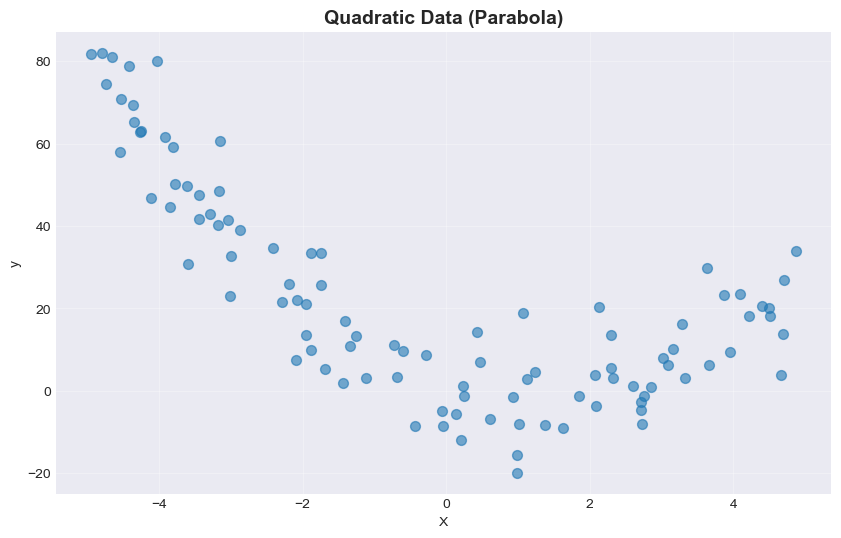

📊 Notice the U-shaped (parabola) pattern!
A straight line would NOT fit this data well.


In [4]:
# Example: Generate data with a quadratic (parabola) relationship

def generate_quadratic_data(n_samples=100, noise=10):
    """
    Generate data following: y = 2x² - 5x + 3 + noise
    """
    X = np.random.uniform(-5, 5, n_samples)
    y = 2 * X**2 - 5 * X + 3 + np.random.normal(0, noise, n_samples)
    return X.reshape(-1, 1), y

# Generate data
X, y = generate_quadratic_data(n_samples=100, noise=10)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=50)
plt.title('Quadratic Data (Parabola)', fontsize=14, fontweight='bold')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 Notice the U-shaped (parabola) pattern!")
print("A straight line would NOT fit this data well.")

#### ✏️ Your Turn:

In [5]:
# TODO: Create your own cubic data generator
# Follow this pattern: y = 0.5x³ - 2x² + x + 5 + noise

def generate_cubic_data(n_samples=100, noise=15):
    """
    Generate data with cubic relationship
    """
    X = np.random.uniform(-5, 5, n_samples)
    # TODO: Calculate y using the cubic formula above
    y = # Your code here
    return X.reshape(-1, 1), y

# Generate and visualize
X_cubic, y_cubic = generate_cubic_data()

# TODO: Create a scatter plot
plt.figure(figsize=(10, 6))
# Your plotting code here

plt.show()

SyntaxError: invalid syntax (3912380240.py, line 10)

---
## 🔹 Section 3: Visualizing Overfitting & Underfitting

### Exercise 3: Compare Different Polynomial Degrees
**Learn:** See the effects of model complexity

#### 📖 Example:

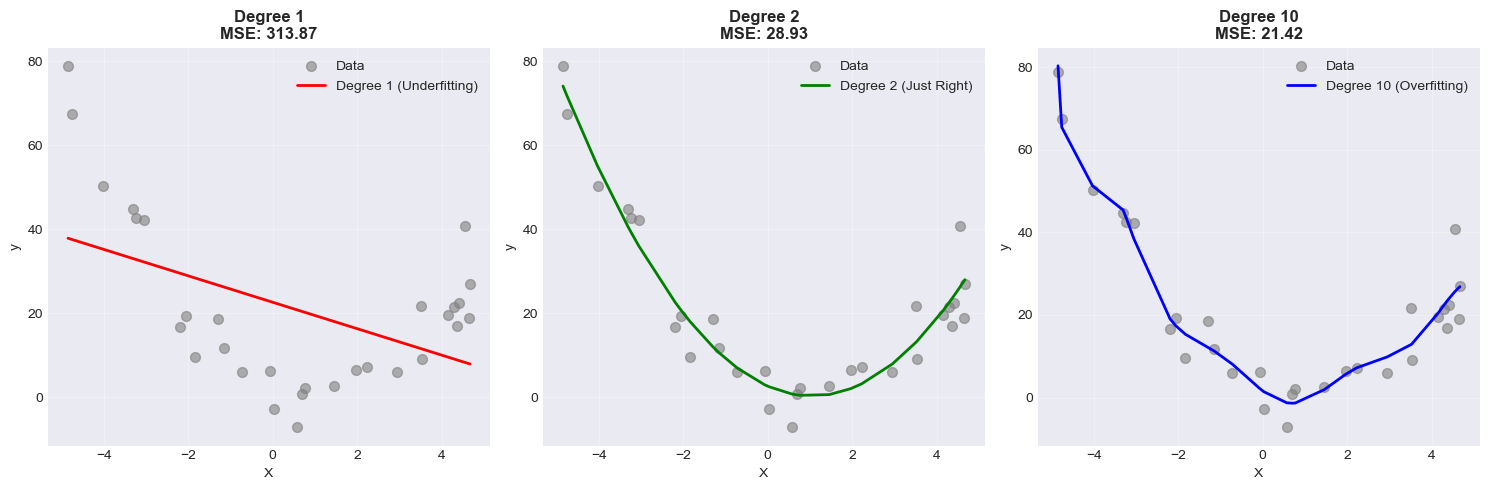

📊 Observations:
   • Degree 1: Too simple, misses the curve (UNDERFITTING)
   • Degree 2: Perfect fit for this data (JUST RIGHT)
   • Degree 10: Wiggly line through every point (OVERFITTING)


In [6]:
# Example: Fit models with different polynomial degrees

# Generate data
X, y = generate_quadratic_data(n_samples=30, noise=5)

# Sort for plotting
sort_idx = np.argsort(X.flatten())
X_sorted = X[sort_idx]
y_sorted = y[sort_idx]

# Test different degrees
degrees = [1, 2, 10]
colors = ['red', 'green', 'blue']
labels = ['Degree 1 (Underfitting)', 'Degree 2 (Just Right)', 'Degree 10 (Overfitting)']

plt.figure(figsize=(15, 5))

for i, (degree, color, label) in enumerate(zip(degrees, colors, labels)):
    plt.subplot(1, 3, i+1)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict
    X_sorted_poly = poly.transform(X_sorted)
    y_pred = model.predict(X_sorted_poly)
    
    # Calculate MSE
    mse = mean_squared_error(y, model.predict(X_poly))
    
    # Plot
    plt.scatter(X, y, alpha=0.6, s=50, color='gray', label='Data')
    plt.plot(X_sorted, y_pred, color=color, linewidth=2, label=f'{label}')
    plt.title(f'Degree {degree}\nMSE: {mse:.2f}', fontsize=12, fontweight='bold')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("   • Degree 1: Too simple, misses the curve (UNDERFITTING)")
print("   • Degree 2: Perfect fit for this data (JUST RIGHT)")
print("   • Degree 10: Wiggly line through every point (OVERFITTING)")

#### ✏️ Your Turn:

In [ ]:
# TODO: Experiment with your cubic data
# Try degrees: 1, 3, 15
# Which degree works best for cubic data?

# Use the cubic data from earlier
X_cubic, y_cubic = generate_cubic_data(n_samples=30, noise=8)

# TODO: Create a similar comparison plot
# Try degrees [1, 3, 15]
# Calculate and print MSE for each

degrees_to_test = # Your code here

# Your plotting code here

---
## 🔹 Section 4: Training vs Test Error

### Exercise 4: Understanding Generalization
**Learn:** Why we split data into training and test sets

#### 📖 Example:

In [ ]:
# Example: Compare training and test error for different degrees

# Generate more data
X, y = generate_quadratic_data(n_samples=100, noise=10)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = range(1, 16)
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train, model.predict(X_train_poly))
    test_mse = mean_squared_error(y_test, model.predict(X_test_poly))
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'o-', linewidth=2, label='Training Error', color='blue')
plt.plot(degrees, test_errors, 's-', linewidth=2, label='Test Error', color='red')
plt.axvline(x=2, color='green', linestyle='--', alpha=0.7, label='True degree (2)')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Training vs Test Error by Model Complexity', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("📊 Key Insights:")
print("   • Training error always decreases with complexity")
print("   • Test error decreases then INCREASES (overfitting!)")
print("   • Best model: lowest TEST error, not training error")
print(f"   • Optimal degree for this data: around 2-3")

#### ✏️ Your Turn:

In [ ]:
# TODO: Find the optimal degree for your cubic data

# Generate cubic data
X_cubic, y_cubic = generate_cubic_data(n_samples=150, noise=15)

# TODO: Split into train and test
X_train_cubic, X_test_cubic, y_train_cubic, y_test_cubic = # Your code here

# TODO: Test degrees from 1 to 15
# Calculate training and test MSE for each
# Plot the results

degrees = range(1, 16)
train_errors_cubic = []
test_errors_cubic = []

# Your code here


# TODO: Print the degree with lowest test error
best_degree = # Your code here
print(f"Best polynomial degree: {best_degree}")

---
## 🔹 Section 5: Ridge Regularization (L2)

### Exercise 5: Implementing Ridge Regression
**Learn:** How L2 regularization prevents overfitting

#### 📖 Example:

In [ ]:
# Example: Compare regular vs Ridge regression on high-degree polynomial

# Generate data
X, y = generate_quadratic_data(n_samples=30, noise=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use high degree (will overfit without regularization)
degree = 10
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Regular Linear Regression (no regularization)
model_regular = LinearRegression()
model_regular.fit(X_train_poly, y_train)

# Ridge Regression (L2 regularization)
model_ridge = Ridge(alpha=10.0)  # alpha controls regularization strength
model_ridge.fit(X_train_poly, y_train)

# Predictions
y_pred_regular = model_regular.predict(X_test_poly)
y_pred_ridge = model_ridge.predict(X_test_poly)

# Errors
mse_regular = mean_squared_error(y_test, y_pred_regular)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("📊 Degree 10 Polynomial - Test Set Performance:")
print(f"Regular Linear Regression MSE: {mse_regular:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"\nImprovement: {((mse_regular - mse_ridge) / mse_regular * 100):.1f}%")

# Compare weights
print("\n📊 Weight Magnitudes:")
print(f"Regular: Max weight = {np.max(np.abs(model_regular.coef_)):.2f}")
print(f"Ridge: Max weight = {np.max(np.abs(model_ridge.coef_)):.2f}")
print("\n✅ Ridge keeps weights smaller → less overfitting!")

#### 📊 Visualize Ridge Effect:

In [ ]:
# Visualize predictions
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.figure(figsize=(14, 5))

# Regular model
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, s=50, label='Training data')
plt.scatter(X_test, y_test, alpha=0.6, s=50, color='red', label='Test data')
plt.plot(X_plot, model_regular.predict(X_plot_poly), 'g-', linewidth=2, label='Regular (Overfits)')
plt.title(f'Regular Linear Regression (Degree {degree})\nTest MSE: {mse_regular:.2f}', 
          fontsize=12, fontweight='bold')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Ridge model
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, alpha=0.6, s=50, label='Training data')
plt.scatter(X_test, y_test, alpha=0.6, s=50, color='red', label='Test data')
plt.plot(X_plot, model_ridge.predict(X_plot_poly), 'b-', linewidth=2, label='Ridge (Regularized)')
plt.title(f'Ridge Regression (Degree {degree}, alpha=10)\nTest MSE: {mse_ridge:.2f}', 
          fontsize=12, fontweight='bold')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Notice how Ridge produces a smoother curve!")

#### ✏️ Your Turn:

In [ ]:
# TODO: Experiment with different alpha (regularization strength) values
# Try: [0.1, 1, 10, 100, 1000]
# Plot test MSE vs alpha

alphas = [0.1, 1, 10, 100, 1000]
test_mses = []

for alpha in alphas:
    # TODO: Create and train Ridge model with this alpha
    model = # Your code here
    
    # TODO: Calculate test MSE
    mse = # Your code here
    test_mses.append(mse)
    print(f"Alpha={alpha:6.1f} → Test MSE: {mse:.2f}")

# TODO: Plot MSE vs Alpha
plt.figure(figsize=(10, 6))
# Your plotting code here

plt.show()

# TODO: Find and print the best alpha
best_alpha = # Your code here
print(f"\n🎯 Best alpha: {best_alpha}")

---
## 🔹 Section 6: Lasso Regularization (L1)

### Exercise 6: Feature Selection with Lasso
**Learn:** How L1 regularization can eliminate features

#### 📖 Example:

In [ ]:
# Example: Lasso for feature selection

# Use high degree polynomial
degree = 15
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Number of polynomial features: {X_train_poly.shape[1]}")

# Fit Lasso
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train_poly, y_train)

# Count non-zero coefficients
non_zero_coefs = np.sum(np.abs(lasso.coef_) > 0.01)  # Count coefficients > 0.01
zero_coefs = X_train_poly.shape[1] - non_zero_coefs

print(f"\n📊 Lasso Feature Selection:")
print(f"Non-zero coefficients: {non_zero_coefs}")
print(f"Zero coefficients (eliminated): {zero_coefs}")
print(f"\n✅ Lasso automatically selected {non_zero_coefs} out of {X_train_poly.shape[1]} features!")

# Performance
y_pred_lasso = lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"\nTest MSE: {mse_lasso:.2f}")

#### 📊 Visualize Coefficient Paths:

In [ ]:
# Show how coefficients shrink with different alphas
alphas_range = np.logspace(-3, 2, 50)
coefs = []

for alpha in alphas_range:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_poly, y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas_range, coefs[:, i], alpha=0.7, linewidth=1.5)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Lasso Coefficient Paths', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

print("📊 As alpha increases:")
print("   • More coefficients → 0 (feature elimination)")
print("   • Model becomes simpler")
print("   • This is automatic feature selection!")

#### ✏️ Your Turn:

In [ ]:
# TODO: Compare Ridge vs Lasso on high-degree polynomial
# Use degree=15, try different alpha values
# Count how many features each keeps

degree = 15
alpha_test = 5.0

# Prepare data
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# TODO: Fit Ridge model
ridge = # Your code here

# TODO: Fit Lasso model
lasso = # Your code here

# TODO: Count non-zero coefficients for each
ridge_nonzero = # Your code here (count coefficients > 0.01)
lasso_nonzero = # Your code here (count coefficients > 0.01)

# TODO: Calculate test MSE for each
ridge_mse = # Your code here
lasso_mse = # Your code here

print("\n📊 Comparison:")
print(f"Ridge: {ridge_nonzero}/{degree} features, Test MSE: {ridge_mse:.2f}")
print(f"Lasso: {lasso_nonzero}/{degree} features, Test MSE: {lasso_mse:.2f}")

---
## 🔹 Section 7: Final Challenge

### Challenge: Build the Best Model
**Task:** Apply everything you've learned to find the optimal model

In [ ]:
# Challenge Dataset
np.random.seed(100)

def generate_challenge_data(n_samples=200):
    X = np.random.uniform(-3, 3, n_samples)
    # Complex relationship with noise
    y = 0.5 * X**3 - 2 * X**2 + X + 5 + np.random.normal(0, 5, n_samples)
    return X.reshape(-1, 1), y

X_challenge, y_challenge = generate_challenge_data()
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(
    X_challenge, y_challenge, test_size=0.25, random_state=42
)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_train_ch, y_train_ch, alpha=0.6, label='Training')
plt.scatter(X_test_ch, y_test_ch, alpha=0.6, color='red', label='Test')
plt.title('Challenge Dataset', fontsize=14, fontweight='bold')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 Your Challenge:")
print("1. Try different polynomial degrees (1-10)")
print("2. For each degree, try both Ridge and Lasso")
print("3. Test different alpha values")
print("4. Find the combination with LOWEST test MSE")
print("5. Visualize your best model's predictions")

In [ ]:
# TODO: Your solution here
# Structure your approach:
# 1. Test degrees 1-10
# 2. For each degree, test Ridge with alphas [0.1, 1, 10, 100]
# 3. For each degree, test Lasso with alphas [0.1, 1, 10, 100]
# 4. Track all results
# 5. Find best combination
# 6. Visualize best model

best_mse = float('inf')
best_config = {}

# Your code here



print("\n🏆 Best Configuration:")
print(f"Model: {best_config['model']}")
print(f"Degree: {best_config['degree']}")
print(f"Alpha: {best_config['alpha']}")
print(f"Test MSE: {best_mse:.2f}")

---
## 🔹 Section 8: Summary & Key Concepts

### 🎯 What You Learned Today:

**1. Polynomial Features:**
- Transform x into [x, x², x³, ...]
- Captures non-linear relationships
- Still use linear regression on transformed features
- Higher degree = more flexibility but risk of overfitting

**2. Overfitting vs Underfitting:**
- **Underfitting**: Model too simple (high bias)
  - Poor on both training and test data
- **Overfitting**: Model too complex (high variance)
  - Great on training, poor on test data
- **Goal**: Balance between the two

**3. Bias-Variance Tradeoff:**
- Bias: Error from wrong assumptions
- Variance: Sensitivity to training data
- Total Error = Bias² + Variance + Noise
- Need to minimize both

**4. Ridge Regularization (L2):**
- Adds penalty: λ × Σ(weights²)
- Shrinks all weights toward zero
- Keeps all features (doesn't eliminate)
- Good when all features are relevant

**5. Lasso Regularization (L1):**
- Adds penalty: λ × Σ|weights|
- Can set weights exactly to zero
- Performs automatic feature selection
- Good when many features are irrelevant

**6. Choosing Regularization:**
- Always split data: train/test
- Optimize on TEST error, not training
- Try multiple alpha values
- Ridge first, Lasso if need feature selection

---

### 📌 Key Takeaways:

✅ **Polynomial features add flexibility** - but can cause overfitting  
✅ **Always use train/test split** - test error is what matters  
✅ **Regularization controls complexity** - prevents overfitting  
✅ **Ridge keeps all features** - Lasso eliminates some  
✅ **Alpha controls strength** - higher alpha = more regularization  
✅ **Cross-validation helps** - find optimal degree and alpha  

---

### 🚀 Next Steps:

- Tomorrow: **Feature Engineering (Hands-on)**
- Learn about encoding categorical variables
- Feature scaling and normalization
- PCA for dimensionality reduction
- Build end-to-end ML pipelines

---

### 💪 Additional Practice:

1. Try polynomial features with real datasets (Boston Housing, California Housing)
2. Implement Ridge and Lasso from scratch using gradient descent
3. Create visualizations showing bias-variance tradeoff
4. Experiment with ElasticNet (combines Ridge + Lasso)
5. Compare scikit-learn's implementation with your own

**Great job mastering polynomial features and regularization! 🎉**